# transform data structure for market basket analysis

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* github: https://github.com/prasertcbs/scikitlearn_tutorial
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

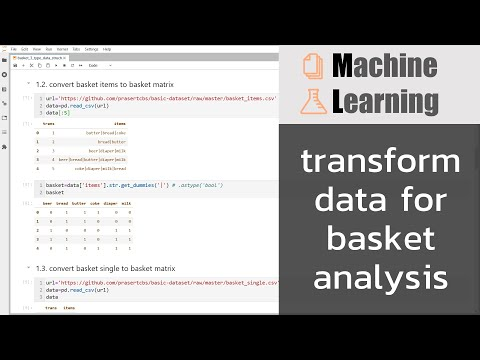

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('5vLZm7eYmC4', width=720, height=405)

In [2]:
import pandas as pd

import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori

%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas  version: {pd.__version__}')
print(f'mlxtend version: {mlxtend.__version__}')

pandas  version: 1.1.3
mlxtend version: 0.18.0


In [4]:
pd.Timestamp.now()

Timestamp('2020-12-07 13:56:45.887121')

## read basket items

```
trans,items
1,butter|bread|coke
2,bread|butter
3,beer|diaper|milk
4,beer|bread|butter|diaper|milk
5,coke|diaper|milk|bread
```

In [5]:
# data=pd.read_clipboard(sep=',')
# data

In [6]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/basket_items.csv'
data=pd.read_csv(url)
data[:5]

,trans,items
0,1,butter|bread|coke
1,2,bread|butter
2,3,beer|diaper|milk
3,4,beer|bread|butter|diaper|milk
4,5,coke|diaper|milk|bread


In [7]:
# long format or single
url='https://github.com/prasertcbs/basic-dataset/raw/master/basket_single.csv'
data=pd.read_csv(url)
data

,trans,items
0,1,butter
1,1,bread
2,1,coke
3,2,bread
4,2,butter
5,3,beer
6,3,diaper
7,3,milk
8,4,beer
9,4,bread


In [8]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/basket_matrix.csv'
data=pd.read_csv(url, index_col=['trans'])
data

,beer,bread,butter,coke,diaper,milk
trans,,,,,,
1,0,1,1,1,0,0
2,0,1,1,0,0,0
3,1,0,0,0,1,1
4,1,1,1,0,1,1
5,0,1,0,1,1,1


## convert basket items to basket matrix

In [9]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/basket_items.csv'
data=pd.read_csv(url)
data[:5]

,trans,items
0,1,butter|bread|coke
1,2,bread|butter
2,3,beer|diaper|milk
3,4,beer|bread|butter|diaper|milk
4,5,coke|diaper|milk|bread


In [10]:
basket=data['items'].str.get_dummies('|') # .astype('bool')
basket

,beer,bread,butter,coke,diaper,milk
0,0,1,1,1,0,0
1,0,1,1,0,0,0
2,1,0,0,0,1,1
3,1,1,1,0,1,1
4,0,1,0,1,1,1


## convert basket single to basket matrix

In [11]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/basket_single.csv'
data=pd.read_csv(url)
data

,trans,items
0,1,butter
1,1,bread
2,1,coke
3,2,bread
4,2,butter
5,3,beer
6,3,diaper
7,3,milk
8,4,beer
9,4,bread


In [12]:
basket=pd.crosstab(data['trans'], data['items'])
basket

items,beer,bread,butter,coke,diaper,milk
trans,,,,,,
1,0,1,1,1,0,0
2,0,1,1,0,0,0
3,1,0,0,0,1,1
4,1,1,1,0,1,1
5,0,1,0,1,1,1


## สร้าง frequent_itemsets พร้อมระบุ min_support

In [13]:
data=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/basket_matrix.csv', index_col=['trans'])
data

,beer,bread,butter,coke,diaper,milk
trans,,,,,,
1,0,1,1,1,0,0
2,0,1,1,0,0,0
3,1,0,0,0,1,1
4,1,1,1,0,1,1
5,0,1,0,1,1,1


In [14]:
basket=data.astype(pd.SparseDtype("bool"))
basket

,beer,bread,butter,coke,diaper,milk
trans,,,,,,
1,False,True,True,True,False,False
2,False,True,True,False,False,False
3,True,False,False,False,True,True
4,True,True,True,False,True,True
5,False,True,False,True,True,True


In [15]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   beer    5 non-null      Sparse[bool, False]
 1   bread   5 non-null      Sparse[bool, False]
 2   butter  5 non-null      Sparse[bool, False]
 3   coke    5 non-null      Sparse[bool, False]
 4   diaper  5 non-null      Sparse[bool, False]
 5   milk    5 non-null      Sparse[bool, False]
dtypes: Sparse[bool, False](6)
memory usage: 125.0 bytes


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   beer    5 non-null      int64
 1   bread   5 non-null      int64
 2   butter  5 non-null      int64
 3   coke    5 non-null      int64
 4   diaper  5 non-null      int64
 5   milk    5 non-null      int64
dtypes: int64(6)
memory usage: 280.0 bytes


In [17]:
frequent_itemsets = apriori(basket, min_support = 0.1, use_colnames = True)
frequent_itemsets['support_n']=frequent_itemsets['support']*len(basket)
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets,support_n
1,0.8,(bread),4.0
2,0.6,(butter),3.0
4,0.6,(diaper),3.0
5,0.6,(milk),3.0
19,0.6,"(diaper, milk)",3.0
10,0.6,"(bread, butter)",3.0
0,0.4,(beer),2.0
11,0.4,"(bread, coke)",2.0
25,0.4,"(beer, diaper, milk)",2.0
31,0.4,"(bread, diaper, milk)",2.0


## สร้าง association rules

In [18]:
# metric = ['support', 'confidence', 'lift', 'leverage', and 'conviction']

# rules = association_rules(frequent_itemsets, metric = "support", min_threshold = .2)
rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = .5)
# rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)

# rules.sort_values('lift', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beer),(bread),0.4,0.8,0.2,0.500000,0.625000,-0.12,0.4
1,(beer),(butter),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8
2,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
3,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
4,(beer),(milk),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
147,"(bread, diaper)","(beer, butter, milk)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
148,"(bread, milk)","(beer, diaper, butter)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
149,"(diaper, butter)","(beer, bread, milk)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
150,"(butter, milk)","(beer, bread, diaper)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
